In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
total_crop_dataset = pd.read_csv('../crop_production.csv')

In [3]:
punjab = total_crop_dataset[total_crop_dataset['State_Name']=='Punjab']

In [4]:
punjab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 161267 to 164439
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     3173 non-null   object 
 1   District_Name  3173 non-null   object 
 2   Crop_Year      3173 non-null   int64  
 3   Season         3173 non-null   object 
 4   Crop           3173 non-null   object 
 5   Area           3173 non-null   float64
 6   Production     3143 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 198.3+ KB


In [5]:
punjab.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       30
dtype: int64

In [6]:
punjab = punjab.dropna()

In [7]:
punjab_filtered = punjab[
    (punjab['Crop']=='Wheat') | 
    (punjab['Crop']=='Rice')  |
    (punjab['Crop']=='Jowar')  |
    (punjab['Crop']=='Bajra')  |
    (punjab['Crop']=='Cardamom')  |
    (punjab['Crop']=='Garlic')  |
    (punjab['Crop']=='Turmeric')  |
    (punjab['Crop']=='Ginger')  |
    (punjab['Crop']=='Cotton(lint)')  |
    (punjab['Crop']=='Linseed')  |
    (punjab['Crop']=='Sesamum')  |
    (punjab['Crop']=='Coconut ')  |
    (punjab['Crop']=='Onion')  |
    (punjab['Crop']=='Arhar/Tur')  |
    (punjab['Crop']=='Potato')  |
    (punjab['Crop']=='Maize')  
]

In [8]:
punjab_filtered_ohe = pd.get_dummies(punjab_filtered, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [9]:
punjab_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_BARNALA,District_Name_BATHINDA,District_Name_FARIDKOT,District_Name_FATEHGARH SAHIB,District_Name_FAZILKA,District_Name_FIROZEPUR,...,Season_Rabi,Season_Whole Year,Crop_Bajra,Crop_Cotton(lint),Crop_Jowar,Crop_Linseed,Crop_Maize,Crop_Rice,Crop_Sesamum,Crop_Wheat
161267,Punjab,1997,1800.0,1400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161268,Punjab,1997,1000.0,1000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
161269,Punjab,1997,7000.0,14000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
161270,Punjab,1997,292000.0,879000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
161271,Punjab,1997,6000.0,1700.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
punjab_filtered_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 161267 to 164439
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State_Name                     1553 non-null   object 
 1   Crop_Year                      1553 non-null   int64  
 2   Area                           1553 non-null   float64
 3   Production                     1553 non-null   float64
 4   District_Name_BARNALA          1553 non-null   uint8  
 5   District_Name_BATHINDA         1553 non-null   uint8  
 6   District_Name_FARIDKOT         1553 non-null   uint8  
 7   District_Name_FATEHGARH SAHIB  1553 non-null   uint8  
 8   District_Name_FAZILKA          1553 non-null   uint8  
 9   District_Name_FIROZEPUR        1553 non-null   uint8  
 10  District_Name_GURDASPUR        1553 non-null   uint8  
 11  District_Name_HOSHIARPUR       1553 non-null   uint8  
 12  District_Name_JALANDHAR        1553 non-n

In [11]:
punjab_filtered_ohe.columns

Index(['State_Name', 'Crop_Year', 'Area', 'Production',
       'District_Name_BARNALA', 'District_Name_BATHINDA',
       'District_Name_FARIDKOT', 'District_Name_FATEHGARH SAHIB',
       'District_Name_FAZILKA', 'District_Name_FIROZEPUR',
       'District_Name_GURDASPUR', 'District_Name_HOSHIARPUR',
       'District_Name_JALANDHAR', 'District_Name_KAPURTHALA',
       'District_Name_LUDHIANA', 'District_Name_MANSA', 'District_Name_MOGA',
       'District_Name_MUKTSAR', 'District_Name_NAWANSHAHR',
       'District_Name_PATHANKOT', 'District_Name_PATIALA',
       'District_Name_RUPNAGAR', 'District_Name_S.A.S NAGAR',
       'District_Name_SANGRUR', 'District_Name_TARN TARAN',
       'Season_Rabi       ', 'Season_Whole Year ', 'Crop_Bajra',
       'Crop_Cotton(lint)', 'Crop_Jowar', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Rice', 'Crop_Sesamum', 'Crop_Wheat'],
      dtype='object')

In [12]:
punjab_filtered_ohe[(punjab_filtered_ohe['Area']==422000.)].transpose()

,161998
State_Name,Punjab
Crop_Year,1997
Area,422000
Production,1.677e+06
District_Name_BARNALA,0
District_Name_BATHINDA,0
District_Name_FARIDKOT,0
District_Name_FATEHGARH SAHIB,0
District_Name_FAZILKA,0
District_Name_FIROZEPUR,1


In [13]:
punjab_filtered_ohe.isnull().sum()

State_Name                       0
Crop_Year                        0
Area                             0
Production                       0
District_Name_BARNALA            0
District_Name_BATHINDA           0
District_Name_FARIDKOT           0
District_Name_FATEHGARH SAHIB    0
District_Name_FAZILKA            0
District_Name_FIROZEPUR          0
District_Name_GURDASPUR          0
District_Name_HOSHIARPUR         0
District_Name_JALANDHAR          0
District_Name_KAPURTHALA         0
District_Name_LUDHIANA           0
District_Name_MANSA              0
District_Name_MOGA               0
District_Name_MUKTSAR            0
District_Name_NAWANSHAHR         0
District_Name_PATHANKOT          0
District_Name_PATIALA            0
District_Name_RUPNAGAR           0
District_Name_S.A.S NAGAR        0
District_Name_SANGRUR            0
District_Name_TARN TARAN         0
Season_Rabi                      0
Season_Whole Year                0
Crop_Bajra                       0
Crop_Cotton(lint)   

In [14]:
X = punjab_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values

In [15]:
y = punjab_filtered_ohe.iloc[:,3].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso(alpha=0.1,max_iter=10000)

In [19]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56891344996.32959, tolerance: 19117956539.82898
  positive)


Lasso(alpha=0.1, max_iter=10000)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [21]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

98.08593636473057 %


In [23]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

97.21370900707083 %


In [24]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

97.21389645384608 %


In [25]:
y_pred = rfregressor.predict(X_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,y_pred)

0.9808593636473057

In [28]:
filename = 'Punjab_Model.sav'
pickle.dump(rfregressor, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [29]:
result

0.9808593636473057

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#plt.figure(figsize=(16,6))

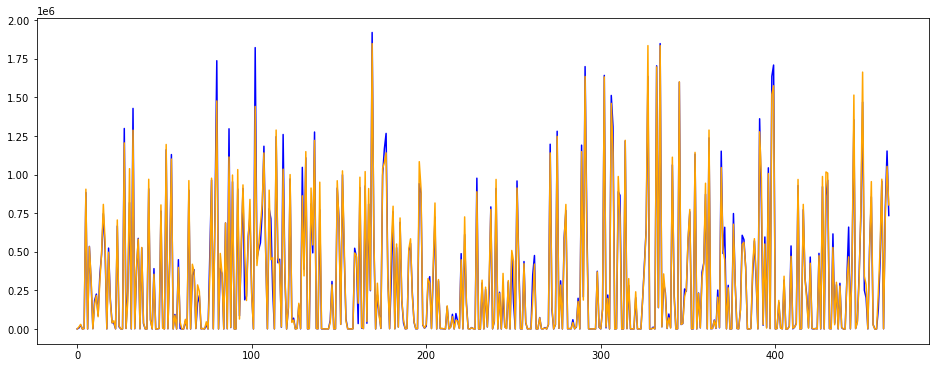

In [32]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')

In [34]:
print(loaded_model)

RandomForestRegressor()
